## Introduction to the study

This research project is centered around an in-depth analysis inspired by the study "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records" by Stract, Beata, and colleagues. The original study delved into the evaluation of a substantial dataset comprising 70,000 patient records from a clinical database, focusing on the role of HbA1c measurement in influencing hospital readmission rates among individuals with diabetes mellitus. 

Central to this research is the hypothesis that there is a significant correlation between HbA1c levels and reduced rates of hospital readmissions. This study aims to go beyond the initial findings to unearth more nuanced understandings of this relationship. And seek to identify and analyze critical factors that are indicative of hospital readmission risks in diabetic patients. Utilizing these insights, the goal is to create a sophisticated predictive model, accurate enough to predict the likelihood of a diabetic patient’s readmission post-discharge, based on the identified factors.

The significance of this study lies in its potentially transformative impact on healthcare management for individuals living with diabetes. It addresses a critical gap by identifying and thoroughly understanding the variables that drive hospital readmissions, a prevalent challenge in diabetes care as evidenced by recent data [reference any relevant statistics or studies here]. This study not only aims to elevate healthcare quality but also to equip healthcare providers with evidence-based strategies for enhancing care delivery and patient outcomes. The ultimate goal is to translate these insights into actionable, effective practices that can significantly improve the management and quality of life for patients with diabetes, potentially influencing healthcare policy and reducing long-term treatment costs.

## Data
The origninal dataset consist of 101,766 medical encounters and 55 distinct variables [https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission/data]. This dataset appears heterogenous and difficult in terms of missing values, and incomplete or inconsistent records, and its high dimensionality understood not only by number of features but also their complexity. Multiple encounters for some patients were included in the data. Preliminary analysis and preprocessing of the data were performed to retain only attributes and  encounters that contain sufficient information. First, duplicated records (30248 records) were removed and only one encounter per patient was maintained in the data. Removal of the duplicated records also removed all mssing records in the attributes; race, diagnosis 1, diagnosis 2 and diagnosis 3. There were also several features that could not be treated directly since they had high percentage of missing values. These features were weight, medical specialty, and payer code. Weight, medical specialty and payer code ocuppies over about 96%, 49% and 40% of missing values,respectively. Weight and payer code were removed from the data, however, medical specialty was maintained and the missing values were replaced with the string "missing". There were about 24 features related to diabetic medications, with each feature indicating whether a drug was prescribed to a patient or if there was a change in dosage. Among these medications, citoglipton, examide, glimepiride-pioglitazone, metformin-pioglitazone, metformin-rosiglitazone, glipizide-metformin, tolazamide, acetohexamide, tolbutamide, and troglitazone were not prescribed to any patient.Moreover, for the few patients who had been using these drugs prior to their latest encounter, there were no dosage changed. These attributes were removed from the final dataset.



The numeric attributes in the dataset were explored using the descibe () function and histogram to get a better understanding of the distribution of the attributes. As obsered from the figure above, the distribution of all the attributes appears asymmetrical. The range of hospital stay, as countered from the time of a patient's admission to discharge varied from a mininum of 1 day to a maximum of 14 days. The dataset also shows a broad spectrum in the number of laboratory tests performed during a patient's encounter. This ranges from a single test to a maximum of 132 lab tests, with an aveage of 43 lab tests. A high degree of variance is also observed in the number of diagnosis recorded for each patient. A signifiicant proportion, approximately 39300 patients, were recorded with 8 to 9 diagnoses. The highest number of diagnosis recorded was 16 and this occurred among 31 patients.Only 193 patients had a single diagnosis recorded.

The dataset was downloaded from kaggle for a complete end to end analysis.
The steps taken in the analysis include:
1. Downloading the dataset from an Kaggle
2. Data preparation and cleaning with Pandas
3. Open-ended exploratory analysis and visualization
4. Asking and answering interesting questions
5. Summarizing inferences and drawing conclusions

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Downloading the required packages-------------------------------------------------------------------------------------- 
!pip install numpy Pandas opendatasets matplotlib seaborn --quiet
!pip install scikit-learn --quiet
!pip install jupyter-datatables --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.3.0 requires matplotlib<3.6,>=3.2, but you have matplotlib 3.7.5 which is incompatible.
pandas-profiling 3.3.0 requires pandas!=1.4.0,<1.5,>1.1, but you have pandas 1.5.3 which is incompatible.
pandas-profiling 3.3.0 requires seaborn<0.12,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.


In [3]:
#Loading the necessary libraries-----------------------------------------------------------------------------------------
#numerical computing library
import numpy as np
#Data analysis library in python
import pandas as pd
import opendatasets as od
#Creating static visualizations in Python
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rcParams
#High-level interface for drawing informative statistical graphics.
import seaborn as sns
#Creating interactive visualizations
import plotly.express as px
#Turns on “inline plotting”, where plot graphics will appear in your notebook
%matplotlib inline
import os

In [4]:
### loading the Data
diabetic_df = pd.read_csv("diabetic_data.csv")
diabetic_df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1378,9539130,498798,AfricanAmerican,Female,[50-60),?,3,1,1,6,...,No,No,No,No,No,No,No,No,Yes,NO
84319,265531998,43971957,Caucasian,Female,[50-60),?,3,1,1,1,...,No,No,No,No,No,No,No,No,No,>30
35659,110291076,19173852,Caucasian,Female,[70-80),?,1,3,6,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
37175,114959442,92315367,Caucasian,Male,[70-80),?,6,1,17,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
21687,75368628,14780889,Caucasian,Male,[50-60),?,1,6,7,10,...,No,No,No,No,No,No,No,No,No,>30


### Data preparation and cleaning with Pandas

Let's view some basic information about the dataset.

In [5]:
n_rows, n_cols = diabetic_df.shape
print('The number of rows in the dataset is', n_rows)
print('The number of columns in the dataset is', n_cols)

The number of rows in the dataset is 101766
The number of columns in the dataset is 50


The majority of the attributes are classified as 'object' data type beacause they contain values of different types. It appears none of the attibutes have empty values since the Non-Null count for all the attributes is equal to the total number of rows (101766) in the dataset. This is not entirely true as observed from the dataframe above.In this dataset, missing values are replaced with the placeholder string'?'. We will have to deal with these values and adjust the data type for each attribute on a case-by-case basis.

In [6]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Let's calculate the number of unique values in the individual columns as this will be useful in identifying how many different categories, types or ranges of values are present in each attribute.

In [7]:
def unique_col_values(df):
    total = df.count()
    temp = pd.DataFrame(total)
    temp.columns = ["Total"]

    unique = []
    for col in df.columns:
        unique_val = df[col].nunique()
        unique.append(unique_val)

    temp["Unique"] = unique
    return(np.transpose(temp))

unique_col_values(diabetic_df)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
Total,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
Unique,101766,71518,6,3,10,10,8,26,17,14,...,1,4,4,2,2,2,2,2,2,3


Replacing the placeholder string '?' in the dataset with NaN shows that there are few of the attributes with high percentage of missing values. These attributes include weight, medical specialty, and payer code ocupping about 96%, 49% and 40% of missing values, respectively. Weight and payer code can be removed from the data, however, medical specialty can be maintained and the missing values replaced with the string "missing".

In [8]:
#Converting all string value (?) in any of the varibales to NaN--------------------------------------------------------
#diabetic_df["weight"][diabetic_df["weight"] == "?"] = None
diabetic_df.replace("?", np.NaN, inplace = True)

#Computing percent missing values in each column in the dataset-----------------------------------------------------------
percent_missing = ((diabetic_df.isnull() | diabetic_df.isna()).sum() * 100 / diabetic_df.index.size).round(2)
missing_value_df = pd.DataFrame({'column_name': diabetic_df.columns,
                                 'percent_missing': percent_missing}).sort_values("percent_missing", ascending = False)

In [9]:
cm = sns.light_palette("green", as_cmap=True)
missing_value_df.head(10).style.background_gradient(cmap=cm)

,column_name,percent_missing
weight,weight,96.860000
medical_specialty,medical_specialty,49.080000
payer_code,payer_code,39.560000
race,race,2.230000
diag_3,diag_3,1.400000
diag_2,diag_2,0.350000
diag_1,diag_1,0.020000
encounter_id,encounter_id,0.000000
tolazamide,tolazamide,0.000000
glyburide,glyburide,0.000000


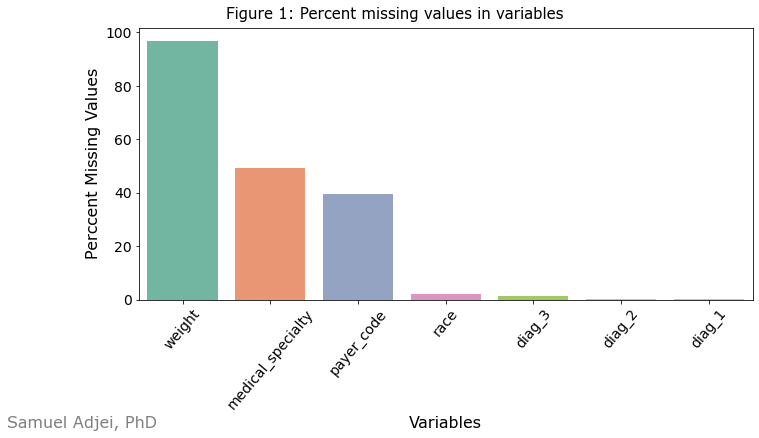

In [10]:
plt.figure(figsize=(11,5))
ax = sns.barplot(x="column_name", y="percent_missing", data = missing_value_df.head(7), palette="Set2")

# Add title---------------------------------------------------------------------------------------------------------------
ax.text(
    .5, 105, "Figure 1: Percent missing values in variables", 
    fontsize=15, font="Verdana")

#ax.set(xlabel ="Column Names", ylabel = "Perccent Missing Values", fontsize=16)------------------------------------------
plt.xlabel('Variables', fontsize=16, font="Verdana");
plt.ylabel('Perccent Missing Values', fontsize=16, font="Verdana")
plt.yticks(size = 14)
plt.xticks(size = 14, rotation=50)

# Add authorship----------------------------------------------------------------------------------------------------------
ax.text(
    -2, -48, "Samuel Adjei, PhD", color='grey',
    fontsize=16, font="Verdana");

In [11]:
dup = diabetic_df.duplicated(["patient_nbr"]).sum()
print("The total number of duplictated inpatient visits is", dup)
#--------------------------------------------------------------------------------------------------------------------------
#Removing duplicated patient visits and maintaining only one encounter per patient----------------------------------------
diabetic_df = diabetic_df.drop_duplicates(subset=["patient_nbr"])

The total number of duplictated inpatient visits is 30248


There are multiple encounters for some patients in the dataset. These duplicated records (30248) have to be removed such that only one encounter per patient is maintained in the data. Removal of the duplicated records will also remove some of the mssing records in the attributes; race, diagnosis 1, diagnosis 2 and diagnosis 3.

Let's drop weight and payer_code together with encounter_id and patient_nbr since they are just unique identifiers of the patients

In [12]:
#Dropping the variable 'weight' and payer_code but maintaining 'medical_specialty' ---------------------------------------
diabetic_df.drop(["weight","payer_code", "encounter_id", "patient_nbr"], axis=1, inplace=True)

Additionally, all encounters that resulted in either discharge to a hospice or patient death were removed to avoid biasing the data. In summary, the dataset consists of hospital admissions of length between one and 14 days that did not result in a patient death or dicharge to a hospice. Each encounter corresponds to a unique patient diagnosed with diabetes, although the primary diagnosis may be different

In [13]:
columns = ["insulin", 
            "metformin", 
            "repaglinide", 
            "nateglinide", 
            "chlorpropamide", 
            "glimepiride", 
            "acetohexamide", 
            "glipizide", 
            "glyburide", 
            "tolbutamide", 
            "pioglitazone", 
            "rosiglitazone",
            "acarbose",
            "miglitol",
            "troglitazone",
            "tolazamide",
            "examide",
            "citoglipton",
            "glyburide-metformin",
            "glipizide-metformin",
            "glimepiride-pioglitazone",
            "metformin-rosiglitazone",
            "metformin-pioglitazone"]

for col in columns:
    print(f"Value counts for {col}, ")
    print(diabetic_df[col].value_counts())
    print("\n")

Value counts for insulin, 
No        34921
Steady    22129
Down       7505
Up         6963
Name: insulin, dtype: int64


Value counts for metformin, 
No        56527
Steady    13718
Up          838
Down        435
Name: metformin, dtype: int64


Value counts for repaglinide, 
No        70592
Steady      824
Up           73
Down         29
Name: repaglinide, dtype: int64


Value counts for nateglinide, 
No        71020
Steady      474
Up           16
Down          8
Name: nateglinide, dtype: int64


Value counts for chlorpropamide, 
No        71446
Steady       67
Up            4
Down          1
Name: chlorpropamide, dtype: int64


Value counts for glimepiride, 
No        67773
Steady     3372
Up          235
Down        138
Name: glimepiride, dtype: int64


Value counts for acetohexamide, 
No        71517
Steady        1
Name: acetohexamide, dtype: int64


Value counts for glipizide, 
No        62412
Steady     8150
Up          578
Down        378
Name: glipizide, dtype: int64


Value 

There are about 23 features related to 23 diabetic medications/drugs (or combos) where each feature indicates whether a drug was prescribed to a patient or if there was a change in dosage during the current hospital stay of a patient. Among these medications, citoglipton, examide, glimepiride-pioglitazone, metformin-pioglitazone, metformin-rosiglitazone, glipizide-metformin, tolazamide, acetohexamide, tolbutamide, and troglitazone were not prescribed to any patient. Moreover, for the few patients who had been using these drugs prior to their admission, their dosages were not changed. These attributes will not have any impact on a patient's rate of readmission. Let's remove these 10 attributes from the dataset.

Removing all ten attributes from the dataset.

In [14]:
#Removing the ten attributes because all records have the same value-------------------------------------------------------
remv_col = ["acetohexamide",  
            "tolbutamide", 
            "troglitazone",
            "tolazamide",
            "examide",
            "citoglipton",
            "glipizide-metformin",
            "glimepiride-pioglitazone",
            "metformin-rosiglitazone",
            "metformin-pioglitazone"]
diabetic_df = diabetic_df.drop(columns = remv_col, axis=1)

Let's recode discharge types, admission types and admission source into their original categories for exploratory purpose

In [15]:
modified_df = diabetic_df.copy()
# Replacement of the 29 distinct values of discharge_disposition_id for exploratory purpose
discharge_disposition_replacement_mapping_dict = {
    1: "Discharged to home",
    2: "Transferred to another short term hospital",
    3: "Transferred to SNF",
    4: "Transferred to ICF",
    5: "Transferred to another type of inpatient care institution",
    6: "Transferred to home with home health service",
    7: "Left AMA",
    8: "Transferred to home under care of Home IV provider",
    9: "Admitted as an inpatient to this hospital",
    10: "Neonate discharged to another hospital for neonatal aftercare",
    11: "Expired",
    12: "Still patient or expected to return for outpatient services",
    13: "Hospice/home",
    14: "Hospice/medical facility",
    15: "Transferred within this institution to Medicare approved swing bed",
    16: "Transferred/referred to another institution for outpatient services",
    17: "Transferred/referred to this institution for outpatient services",
    18: "NULL",
    19: "Expired at home. Medicaid only, hospice",
    20: "Expired in a medical facility. Medicaid only, hospice",
    21: "Expired, place unknown. Medicaid only, hospice",
    22: "Transferred to another rehab fac including rehab units of a hospital",
    23: "Transferred to a long term care hospital",
    24: "Transferred to a nursing facility certified under Medicaid but not certified under Medicare",
    25: "Not Mapped",
    26: "Unknown/invalid",
    27: "Transferred to a federal health care facility",
    28: "Transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
    29: "Transferred a Critical Access Hospital (CAH)",
}

modified_df["discharge_disposition_id"] = modified_df["discharge_disposition_id"].replace(
    discharge_disposition_replacement_mapping_dict)

In [16]:
# Replacement of the 29 distinct values of discharge_disposition_id
admission_type_id_replacement_mapping_dict = {
    1: "Emergency",
    2: "Urgent",
    3: "Elective",
    4: "Newborn",
    5: "Not Available",
    6: "NULL",
    7: "Trauma Center",
    8: "Not Mapped"
}

modified_df["admission_type_id"] = modified_df["admission_type_id"].replace(
                                    admission_type_id_replacement_mapping_dict)

In [17]:
admission_source_id_replacement_mapping_dict = {
    1: "Physician Referral",
    2: "Clinic Referral",
    3: "HMO Referral",
    4: "Transfer from a hospital",
    5: "Transfer from a Skilled Nursing Facility (SNF)",
    6: "Transfer from another health care facility",
    7: "Emergency Room",
    8: "Court/Law Enforcement",
    9: "Not Available",
    10: "Transfer from critial access hospital",
    11: "Normal Delivery",
    12: "Premature Delivery",
    13: "Sick Baby",
    14: "Extramural Birth",
    15: "Not Available",
    16: "Not Available",
    17: "NULL",
    18: "Transfer From Another Home Health Agency",
    19: "Readmission to Same Home Health Agency",
    20: "Not Mapped",
    21: "Unknown/Invalid",
    22: "Transfer from hospital inpt/same fac result in a sep claim",
    23: "Born inside this hospital",
    24: "Born outside this hospital",
    25: "Transfer from Ambulatory Surgery Center",
    26: "Transfer from Hospice"
}

modified_df["admission_source_id"] = modified_df["admission_source_id"] \
                                        .replace(admission_source_id_replacement_mapping_dict)

There are missing values in the attribute discharge_disposition, admission_type and admission_source that are in different format. Let's replace all these values with the placeholder "missing".

In [18]:
#Changing all 'null', 'not mapped' and unknown/invalid values in the discharge_disposition_id to "missing"-----------------
discharge_disposition_replace_values = {"NULL", "Not Mapped", "Unknown/Invalid"}
modified_df["discharge_disposition_id"] = np.where(modified_df["discharge_disposition_id"] \
                        .isin(discharge_disposition_replace_values), "missing", modified_df["discharge_disposition_id"])

#Changing all 'null', 'not mapped' values in the admission_type_id to "missing"--------------------------------------------
admission_type_replace_values = {"NULL", "Not Mapped", "Not Available"}
modified_df["admission_type_id"] = np.where(modified_df["admission_type_id"] \
                                .isin(admission_type_replace_values), "missing", modified_df["admission_type_id"])

#Changing all 'null','not mapped','not available' and Unknow/Invalid values in the admission_source_id to "missing"---------
admission_source_replace_values = {"NULL", "Not Mapped", "Not Available", "Unkown/Invalid"}
modified_df["admission_source_id"] = np.where(modified_df["admission_source_id"] \
                                .isin(admission_source_replace_values), "missing", modified_df["admission_source_id"])

Let's capture the numeric and categorical attributes in the dataset

In [19]:
#Capturing the numeric and categorical attributes in the dataset------------------------------------------------------------
numeric_cols = modified_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = modified_df.select_dtypes('object').columns.tolist()

In [20]:
print(f"The total numeric attributes in the dataset is {len(numeric_cols)} as listed: {tuple(numeric_cols)}")

The total numeric attributes in the dataset is 8 as listed: ('time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses')


In [21]:
print(f"The categorical variables in the dataset {len(categorical_cols)} as listed: {tuple(categorical_cols)}")

The categorical variables in the dataset 28 as listed: ('race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 'readmitted')


### Exploratory Analysis and Visualization

Let's compute some basic statistics of the numeric attribute with the describe () function and also use histogram to better understand their distribution.

In [22]:
#Basic statistics of the numeric variables in the data
#modified_df[modified_df.columns[2:]].describe().style.background_gradient(cmap="Blues")
modified_df.describe().style.background_gradient(cmap="Blues")

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000
mean,4.289130,43.075478,1.430577,15.705025,0.280069,0.103540,0.177829,7.245700
std,2.949210,19.952338,1.759864,8.311163,1.068957,0.509187,0.603790,1.994674
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000


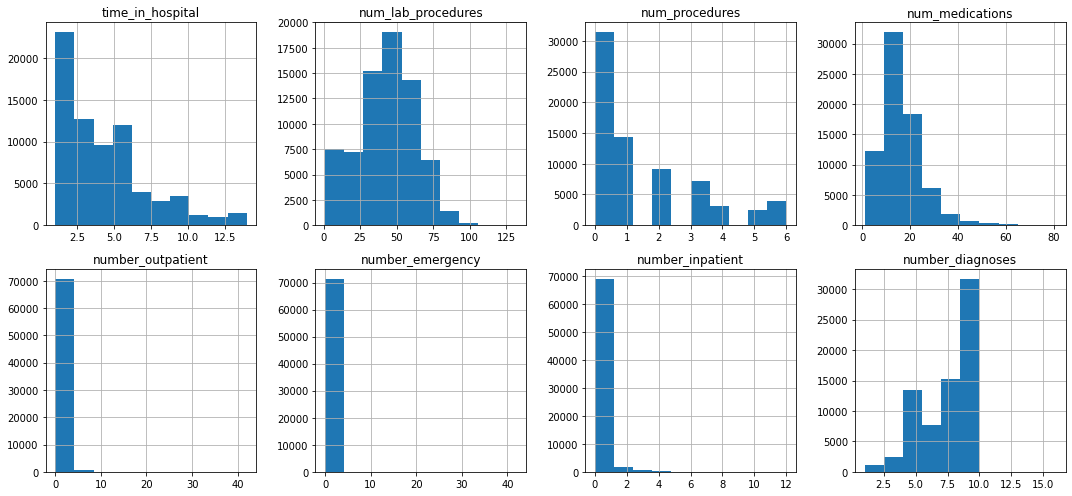

In [23]:
#Creating a histogram of each column by looping through the numeric columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    modified_df[col].hist(ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

The distribution of all the attributes appears asymmetrical. The range of hospital stay, as countered from the time of a patient's admission to discharge varied from a mininum of 1 day to a maximum of 14 days. The dataset also shows a broad spectrum in the number of laboratory tests performed during a patient's encounter. This ranges from a single test to a maximum of 132 lab tests, with an aveage of 43 lab tests. A high degree of variance is also observed in the number of diagnosis recorded for each patient. A signifiicant proportion, approximately 39300 patients, were recorded with 8 to 9 diagnoses. The highest number of diagnosis recorded was 16 and this occurred among 31 patients.Only 193 patients had a single diagnosis recorded.

Let's also use visuals to understand the distribution of some of the categorical attributes

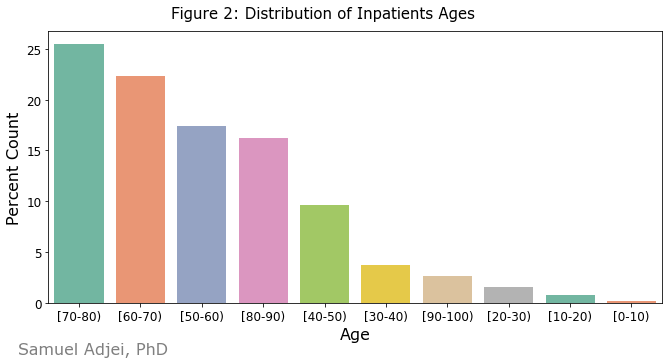

In [24]:
#Computing percent of age categories
age = modified_df.age.value_counts()*100 / modified_df.age.count()

#Age distribution of inpatients-------------------------------------------------------------------------------------------
rcParams['figure.figsize'] = 11, 5
sns.barplot(x=age.index, y=age, palette="Set2")

#plt.title('Distribution of Inpatients Ages', fontsize=16)
# Add title---------------------------------------------------------------------------------------------------------------
plt.text(
    1.5, 28, "Figure 2: Distribution of Inpatients Ages", 
    fontsize=15, font="Verdana")

plt.xlabel('Age', fontsize=16, font="Verdana")
plt.ylabel('Percent Count', fontsize=16, font="Verdana")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -1, -5, "Samuel Adjei, PhD", color='grey',
    fontsize=16, font="Verdana");

There is significant variation in the age distribution of the patients as a mark trend of increased diabetes prevalence in elderly populations relative to young ones is observed. About 84% of the patients fall within the ages of 50 to 100 years whereas the young population, constituting ages below 50, accounts for only about 16% of the total patients. The number of patients within the ages of 90 to 100 years is significantly low. This observation may be attributable to decreased longevity in individuals afflicted with diabetes, potentially leading to a reduced likelihood of reaching these advanced age brackets.

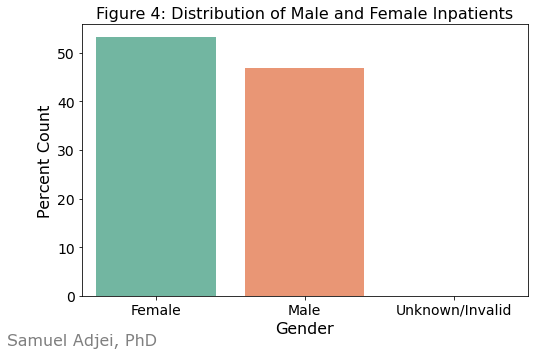

In [25]:
#Computing percent of male and female inpatients
gender = modified_df.gender.value_counts()*100 / modified_df.gender.count()

rcParams['figure.figsize'] = 8, 5
sns.barplot(x=gender.index, y=gender, palette="Set2")

plt.title('Figure 4: Distribution of Male and Female Inpatients', fontsize=16)
plt.xlabel('Gender', fontsize=16, font="Verdana")
plt.ylabel('Percent Count', fontsize=16, font="Verdana")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -1, -10, "Samuel Adjei, PhD", color='grey',
    fontsize=16, font="Verdana");

The prevalence of Diabetes Mellitus shows gender-based disparity. The distribution of males and females in the dataset indicates that females constitute majority of the patient population, accounting for over 50%, while males represent about 46%. Such a distribution underscores a higher incidence of the condition among females compared to males.

Let's divide the patients into categories based on their discharge disposition. From the figure below, it appears that most of the patients were discharged to their homes. The proportion of patients discharged to skilled nursing facility (SNF) and those transferred to their homes with home health services appears approximately equal. Some of the patients expired in various settings, including the medical facility, hospice, homes, homes with Medicaid coverage, among others. We have to deal with these categories of discharge disposition as they could potentially impact the predictive accuracy regarding patient readmission.

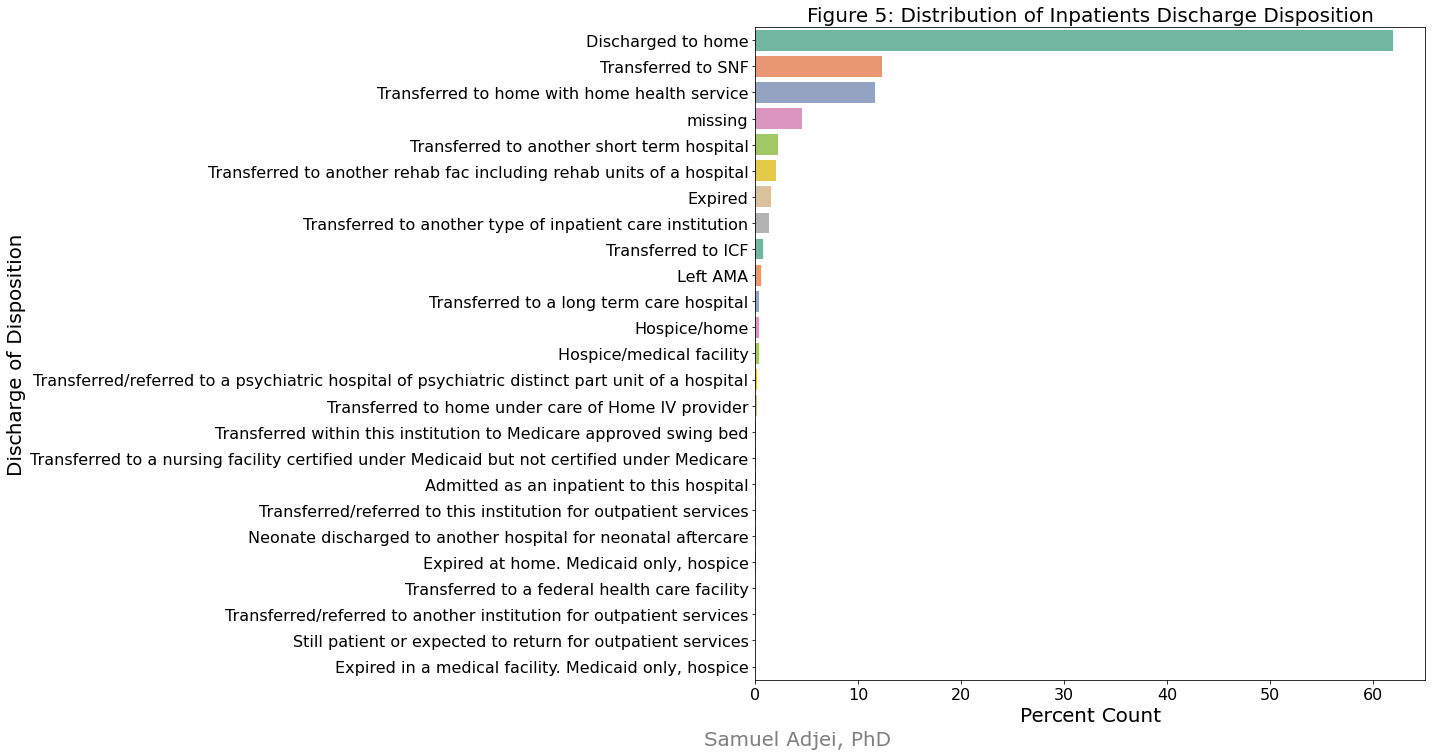

In [26]:
#Computing percent of inpatients discharge disposition
discharge_disposition = modified_df.discharge_disposition_id.value_counts()*100 / modified_df.discharge_disposition_id.count()

rcParams['figure.figsize'] = 12, 12
sns.barplot(x=discharge_disposition, y=discharge_disposition.index, palette="Set2")\
                                        .set_title('Figure 5: Distribution of Inpatients Discharge Disposition', fontsize=20)

plt.xlabel('Percent Count', fontsize=20, font="Verdana")
plt.ylabel('Discharge of Disposition', fontsize=20, font="Verdana")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -5, 27, "Samuel Adjei, PhD", color='grey',
    fontsize=20, font="Verdana");

Let's now analyze the distribution of admission types for inpatients hospital stays. About 50% of the patients were admitted through the emergency room. There is no signifcant difference in the number of patients admitted to the first available and suitable room versus those whose conditions permitted ample time to schedule the availability of a suitable accommodation. About 12% of the source values were either missing, unknown or invalid.

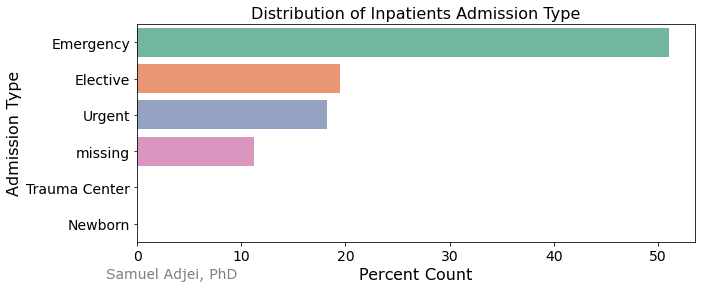

In [27]:
#Computing percent of inpatients admission type
admission_type = modified_df.admission_type_id.value_counts()*100 / modified_df.admission_type_id.count()

rcParams['figure.figsize'] = 10, 4
sns.barplot(x=admission_type, y=admission_type.index, palette="Set2")\
                                                    .set_title('Distribution of Inpatients Admission Type', fontsize=16)

plt.xlabel('Percent Count', fontsize=16, font="Verdana")
plt.ylabel('Admission Type', fontsize=16, font="Verdana")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -3, 6.5, "Samuel Adjei, PhD", color='grey',
    fontsize=14, font="Verdana");

The data for admission type should reflect the admission source. Let's examine what the data on the origin of the patients admission to the hospital reveals. The figure below shows that approximately 55% of the patients were admitted to the hospital after receiving services in the hospital's emergency room department. Additionally, about 30% of the patients were admitted to the facility upon an order of a physician.

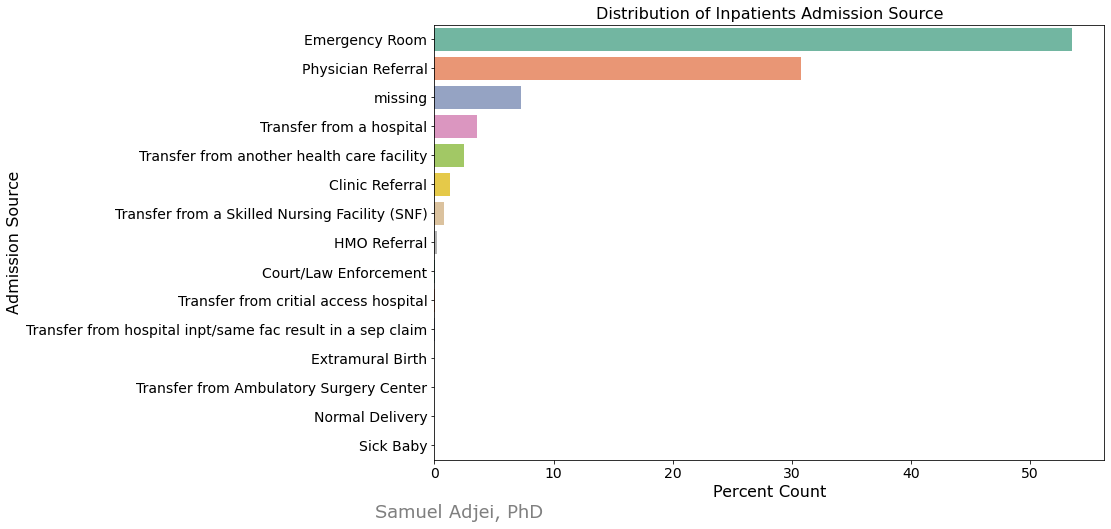

In [28]:
#Computing percent of inpatients admission_source
admission_source = modified_df.admission_source_id.value_counts()*100 / modified_df.admission_source_id.count()

rcParams['figure.figsize'] = 12, 8
sns.barplot(x=admission_source, y=admission_source.index, palette="Set2")\
                                                    .set_title('Distribution of Inpatients Admission Source', fontsize=16)

plt.xlabel('Percent Count', fontsize=16, font="Verdana")
plt.ylabel('Admission Source', fontsize=16, font="Verdana")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -5, 16.5, "Samuel Adjei, PhD", color='grey',
    fontsize=18, font="Verdana");

There are three categories in the 'days to inpatient readmission' attribute. A values of '<30' implies that a patient was readmitted in less than 30 days. The value '>30' indicates readmission in more than 30 days, while 'NO' signifies no record of the patient's readmission. The data below shows that approximately 60% of inpatients have no record of readmission. Among  readmitted, less than 10% were readmitted within 30 days of their discharge from the hospital.

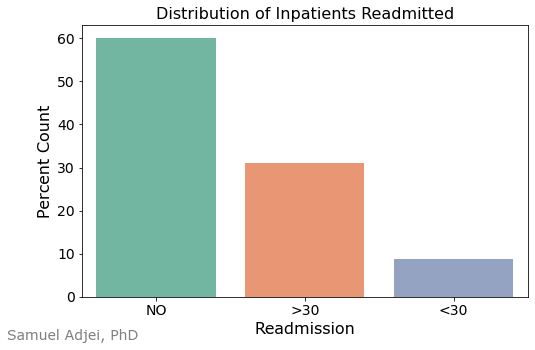

In [29]:
#Computing percent of inpatients readmitted
readmitted = modified_df.readmitted.value_counts()*100 / modified_df.readmitted.count()

rcParams['figure.figsize'] = 8, 5
sns.barplot(x=readmitted.index, y=readmitted, palette="Set2").set_title('Distribution of Inpatients Readmitted', fontsize=16)

plt.xlabel('Readmission', fontsize=16, font="Verdana")
plt.ylabel('Percent Count', fontsize=16, font="Verdana")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -1, -10, "Samuel Adjei, PhD", color='grey',
    fontsize=14, font="Verdana");

Let's explore the data further by asking some basic questions:
- What are the glucose serum test results for inpatients who did not receive diabetes medication(s) versus those who received diabetic medication(s), and did these results have any impact on their rates of hospital readmission?

Let's tackle the question by first creating a dataframe with a subset attributes from the modified dataframe. The attributes relevant to the question include "max_glu_serum", "diabetesMed", and "readmitted". Next, we group the patients based on the unique combination of the values in these three attributes and count the occurrences of combination within the groups. In summary, we want to determine how many patients both with and without diabetes medication, have been readmitted to the hospital, categorized by their maximum glucose serum level and their diabetes medication status. 

The table below shows that out of the 71518 patients, 54,319 were prescribed diabetic medication(s). Of these patients, 51,850 were prescribed diabetic medication(s) without having their glucose serum levels tested. Among this group, 30,340 were not readmitted, while 16,744 and 4,766 pateints were readmitted after 30 days and in less than 30 days, respectively. We can assume that the glucose serum levels of patients whose glucose serum levels were not tested were already known, as ideally, a patient should not be prescribed diabetic medication without having their glucose serum levels tested.

Similar trend is observed among the patients without without diabetic medications. Out of the 17,199 patients in this category, glucose serum levels of 15,212 are unknown or not tested. Of this patinets, 10,693 were not readmitted while 4,334 and 1,185 were readmitted after 30 days and in less than 30 days, respectively.

Getting direct answer to our question is a bit dicey, as the number of patients with unknown glucose serum levels is large in both groups, those with and without diabetes medication. However, generally, the number of patients readmitted after 30 days is signifcantly high, and most of these patients have glucose serum levels greater than 200. 

In [30]:
#Computing Diabetes Medications Status vs Glucose Serum Test Result and their Impact on Inpatient Readmission--------------
Glu_Alc_diabetesMed_vs_readmission_df = modified_df[["max_glu_serum","A1Cresult","diabetesMed","readmitted"]]
readmission_count = Glu_Alc_diabetesMed_vs_readmission_df.groupby(
                                                ["diabetesMed","max_glu_serum","readmitted"])["diabetesMed"].count()

readmission_count.to_frame("count").style \
  .bar(align='mid', color=['#FCC0CB', '#90EE90']) \
  .set_caption('Diabetes Medications Status vs Glucose Serum Test Result and their Impact on Inpatient Readmission') \
  .set_properties(padding="10px", border='2px solid white', width='150px')

- What are the Alc test results for inpatients who did not receive diabetes medication(s) versus those who received diabetic medication(s), and did these results have any impact on their rates of hospital readmission?

Similar to out first question, the Alc test of majority of the patients were not measured. The number of patients readmitted after 30 days is signifcantly high, and most of these patients have Alc test greater than 8%.

In [31]:
readmission_count = Glu_Alc_diabetesMed_vs_readmission_df.groupby(
                                        ["diabetesMed","A1Cresult","readmitted"])["diabetesMed"].count().to_frame("Count")

readmission_count.style \
  .bar(align='mid', color=['#FCC0CB', '#90EE90']) \
  .set_caption('Diabetes Medications Status vs Alc Test Result and their Impact on Inpatient Readmission') \
  .set_properties(padding="10px", border='2px solid white', width='150px')

### What is the total number of medications that were changed for each inpatient during their hospital stay?

In [32]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin']

med_counts = (modified_df[keys].applymap(lambda x: 1 if x != 'No' and x != 'Steady' else 0).sum(axis=1)).value_counts()

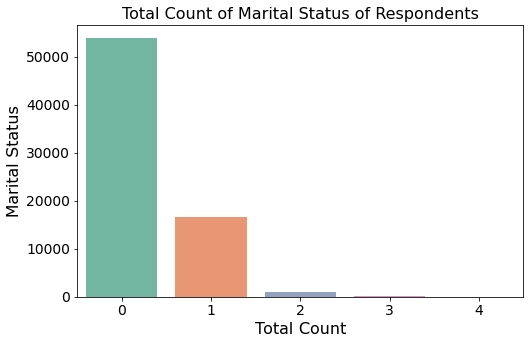

In [33]:
sns.barplot(x=med_counts.index, y=med_counts, palette="Set2").set_title('Total Count of Marital Status of Respondents',
                                                              fontsize=16)

plt.xlabel('Total Count', fontsize=16, font="Verdana")
plt.ylabel('Marital Status', fontsize=16, font="Verdana")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14);

- What is the death rate among the various admission types?

Let's check out the death rates for emergency, elective, elective, trauma center admissions, and those unknown. The "discharge_disposition" attribute contains the various states related to hospital discharge. We will list all the states in this attribute related to death, including patients discharged to hospice, due to their higher likelihood of mortality. Next, we will filter the data to focus on the patients within the list, and select only the relevant attributes necessary to address our primary question and subsequent questions as well. 

In [34]:
lists = {"Expired", "Hospice/home","Hospice/medical facility", "Expired at home. Medicaid only, hospice",
        "Expired in a medical facility. Medicaid only, hospice", "Expired, place unknown. Medicaid only, hospice"}
death_df = modified_df.loc[modified_df["discharge_disposition_id"].isin(lists)] \
                                            [["race","age","time_in_hospital","admission_type_id","discharge_disposition_id"]] 

#Changing all null and not available values to not available----------------------------------------------------------------
#death_df.loc[(death_df.admission_type_id == "NULL") | (death_df.admission_type_id == "Not Available")] = "Not Available"

The figure displays the number of deaths recorded for each admission type. Note that death rate among patients admitted to the hospital through the emergency room is signifcantly higher than all the other admission types.This is expected as majority of the patients in the data were admitted from the emergency facility.

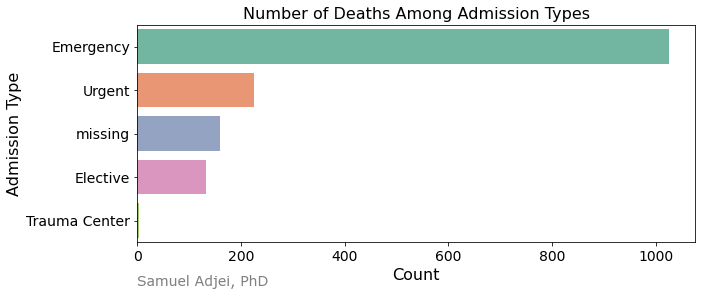

In [35]:
count_death_per_admission = death_df.admission_type_id.value_counts(ascending=False)

rcParams['figure.figsize'] = 10, 4
sns.barplot(x=count_death_per_admission, y=count_death_per_admission.index, palette="Set2") \
                                                .set_title("Number of Deaths Among Admission Types", fontsize=16)
plt.xlabel('Count', fontsize=16, font="Verdana")
plt.ylabel('Admission Type',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -1, 5.5, "Samuel Adjei, PhD", color='grey',
    fontsize=14, font="Verdana");

- What are the death rates for emergency, elective, and urgent admission types within the first 1 to 4 days of hospitalization?

The distribution in the duration of hospital stays, measured from admission to discharge as addressed ealier, shows that a substantial proportion of the patients were hospitalized between 1 to 4 days, while only a small proportion experience extended stays of 10 to 14 days. Let's first check out death rate across the admission types within the first 4 days of hospitalization. Again, death rate among patients admitted through the emergency facility is comparatively high. When Comparing death rates between urgent and elective admission types, the rate observed in urgent admissions is higher.

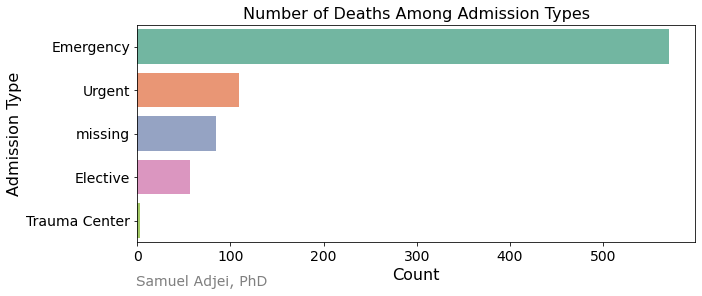

In [36]:
count_death_per_admission = death_df.loc[death_df["time_in_hospital"] <= 4].admission_type_id.value_counts(ascending=False)

rcParams['figure.figsize'] = 10, 4
sns.barplot(x=count_death_per_admission, y=count_death_per_admission.index, palette="Set2") \
                                                .set_title("Number of Deaths Among Admission Types", fontsize=16)
plt.xlabel('Count', fontsize=16, font="Verdana")
plt.ylabel('Admission Type',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -1, 5.5, "Samuel Adjei, PhD", color='grey',
    fontsize=14, font="Verdana");

I think we can observe similar case for the small proportion of patients that experienced extended stays of 10 to 14 days. However, the number of deaths recorded for urgent and elective admission types appears to be approximately equal. The explaination for this observation could be twofold: either the majority of patients admitted urgently expired or were discharged before day 10. We will investiagte this further later in the analysis.

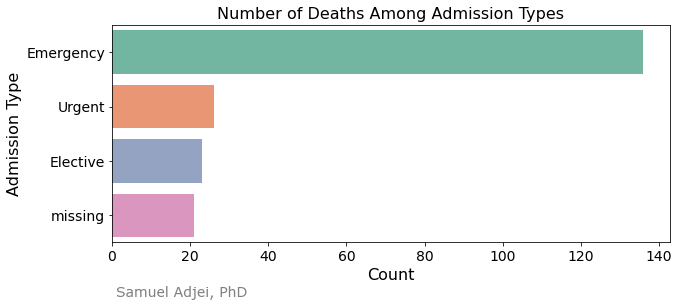

In [37]:
count_death_per_admission = death_df.loc[(death_df["time_in_hospital"] >= 10) & (death_df["time_in_hospital"] <= 14)] \
                                                                        .admission_type_id.value_counts(ascending=False)

rcParams['figure.figsize'] = 10, 4
sns.barplot(x=count_death_per_admission, y=count_death_per_admission.index, palette="Set2") \
                                                .set_title("Number of Deaths Among Admission Types", fontsize=16)
plt.xlabel('Count', fontsize=16, font="Verdana")
plt.ylabel('Admission Type',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    1, 4.5, "Samuel Adjei, PhD", color='grey',
    fontsize=14, font="Verdana");

- What is the death rate among different age groups within each race?

The dataset is heterogeneous, involving patients of diverse races and age groups. Let's examine the death rate, segmented by age groups and further stratified by race. Death rate across all races appears to be high in the age groups of 60-70, 70-80, and 80-90. However, this observation differs among Asians, as there is an increase in death rate among patients in the age group of 50-60. Individuals in their early ages, unlike other races, are also less likely to die from diabetes. Could this observation be explained by the fact that individuals in their early ages are less exposed to diabetes compared to the elderly? Additionally, what is the interplay of genetics, environment, and lifestyle in Asians of this age group, and how do these factors differ from those in other races?

In [38]:
#Group the DataFrame by the race and age columns, and count the number of occurrences of each group
death_counts = death_df.groupby(["race","age"]).size().reset_index(name='count')

#Add a new column with percentages based on the race column---------------------------------------------------------------
death_counts['percent'] = \
            (death_counts.apply(lambda x: x['count'] / death_counts[death_counts['race'] == x['race']]['count'] \
            .sum(), axis=1)*100).round(2)

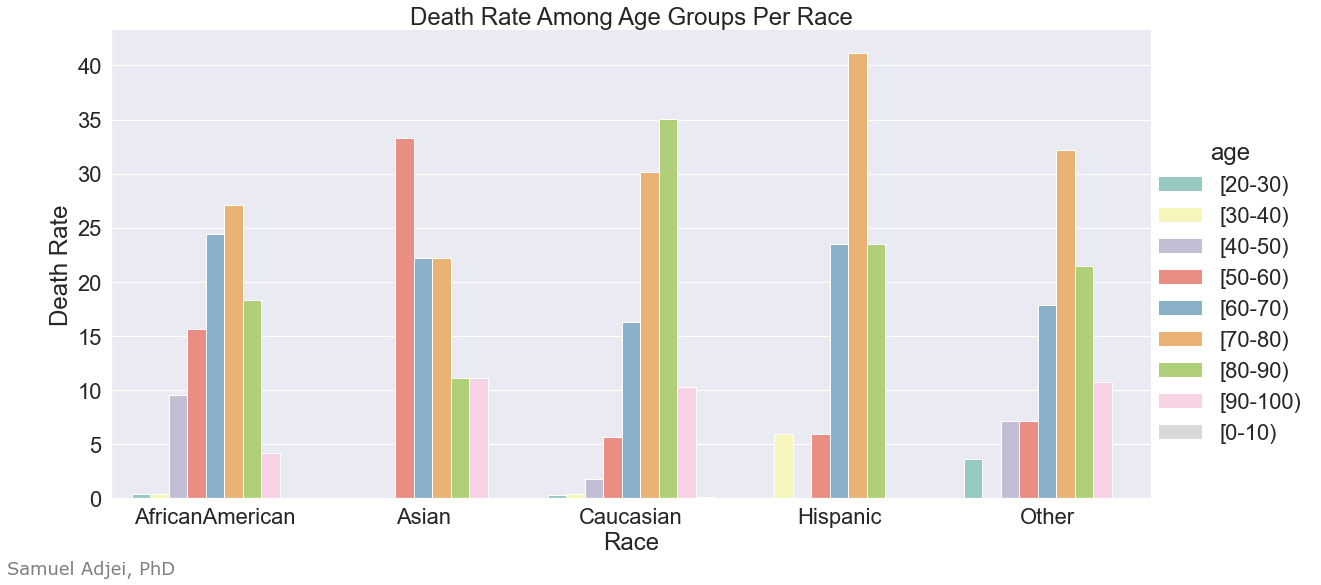

In [39]:
sns.set(font_scale = 2)
g=sns.catplot(data=death_counts, x="race", y="percent", hue = "age", kind = "bar", height=8, aspect=2, palette="Set3")

g.set(xlabel="Race")
g.set(ylabel="Death Rate")
g.set(title="Death Rate Among Age Groups Per Race" )

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -1, -7, "Samuel Adjei, PhD", color='grey',
    fontsize=18, font="Verdana");

- What are the readmission rates for different admission types?

Let's check out the readmission rates for emergency, elective, trauma center admissions, and those categorized as unknown. It appears that the highest proportion of patients across these admission types have no record of readmission. Additionally, the Significantly high proportion of the patients readmitted more than 30 days post-discharge is observed across all admission types.

In [40]:
#Select the admission_type_id and readmitted columns----------------------------------------------------------------------
readmitted_and_admission_type = modified_df[["admission_type_id","readmitted"]]

#Group the DataFrame by the admission_type_id and readmitted columns, and count the number of occurrences of each group
counts = readmitted_and_admission_type.groupby(["admission_type_id","readmitted"]).size().reset_index(name='count')

#Add a new column with percentages based on the admission_type_id column-------------------------------------------------
counts['percent'] = \
            (counts.apply(lambda x: x['count'] / counts[counts['admission_type_id'] == x['admission_type_id']]['count'] \
            .sum(), axis=1)*100).round(2)

In [41]:
from IPython.display import HTML
admit_col = counts['admission_type_id']
readmt_col = counts['readmitted']
count_col = counts['count']
per_col = counts['percent']

head = """
<table>
    <thead>
        <th>Align</th>
        <th>Admission Type</th>
        <th>Readmission Category</th>
        <th>Readmission Count</th>
        <th>Percent Count</th>
    </thead>
    </tbody>

"""

aligns = ['mid']
for align in aligns:
    row = "<tr><th>{}</th>".format(align)
    for series in [admit_col,readmt_col,count_col,per_col]:
        s = series.copy()
        s.name=''
        row += "<td>{}</td>".format(s.to_frame().style.bar(align=align,
                                                           color=['#d65f5f', '#5fba7d'],
                                                           width=100).render()) 
    row += '</tr>'
    head += row

head+= """
</tbody>
</table>"""


HTML(head)

- Does age influence the rate of readmission in inpatient hospital care?

Let's approach this problem by first performing some feature engineering on the dataset, as demonstrated below. We will then generate a figure to illustrate the correlation between age and the likelihood of hospital readmissions. From the figure, we can see a marked increase in readmission rates from the age group of 30-40, with the higest rates observed in the 70-80 age bracket. A significant decrease in readmission rates is however, observed beyond this age group. A plausible explanation for this trend is the significantly higher death rate among patients aged 70-80 and older, resulting in lower readmission rates for these older age groups. In the 30-40 to 50-60 age brackets, the proportion of patients without a record of readmission is marginally higher than that of those who were readmitted, and this number evens out at in the 60-70 age group. Beyond this, a signifcant reduction in patients without readmission records is observed compared to those readmitted within the same age group. 

### Feature Engineering

In [42]:
#Removing all encounters that resulted in either discharge to a hospice or patient death and aslo all NULL, 
                                                                #not mapped and unknown/invalid encounters-----------------
missin_discharge_values = {"Expired", "Hospice/home", "Hospice/medical facility", "missing", 
                        "Expired at home. Medicaid only, hospice","Expired in a medical facility. Medicaid only, hospice", 
                        "Expired, place unknown. Medicaid only, hospice"}
modified_df = modified_df[~ modified_df["discharge_disposition_id"].isin(missin_discharge_values)]

#Removing Unknown/Invalid values in the gender column----------------------------------------------------------------------
modified_df = modified_df.loc[modified_df["gender"] != "Unknown/Invalid"]

#Recoding the values of the column readmitted by assigning "0" to values "NO", otherwise "1"-------------------------------
modified_df["readmitted"] = np.where(modified_df["readmitted"] == "NO", 0, 1)

#Computing the sum of the values in the three columns for each row and assigning the result to a new column "Utilization"
modified_df["Utilization"] = modified_df[["number_outpatient", "number_emergency", "number_inpatient"]].sum(axis=1)

#Dropping the variables "number_outpatient", "number_emergency", and "number_inpatient" from the dataset
modified_df.drop(["number_outpatient", "number_emergency", "number_inpatient"], axis =1, inplace =True)

#Filling missing values in the variable diag_1 with 'missing'--------------------------------------------------------------
modified_df["diag_1"] = modified_df["diag_1"].fillna("missing")

#Filling missing values in the variable race with 'missing'--------------------------------------------------------------
modified_df["race"] = modified_df["race"].fillna("missing")

#Filling missing values in the variable medical_specialty with 'missing'----------------------------------------------------
modified_df["medical_specialty"] = modified_df["medical_specialty"].fillna("missing")

In [43]:
#Group the DataFrame by the age and readmitted columns, and count the number of occurrences of each group
age_vs_readmission = modified_df[["age","readmitted"]].groupby(["age","readmitted"]).size().reset_index(name='count')

Inpatient_admit = age_vs_readmission.loc[age_vs_readmission['readmitted'] == 1]
Inpatient_admit["Percent"] = ((Inpatient_admit["count"] / Inpatient_admit["count"].sum()) * 100).round(2)

no_admit = age_vs_readmission.loc[age_vs_readmission['readmitted'] == 0]
no_admit["Percent"] = ((no_admit["count"] / no_admit["count"].sum()) * 100).round(2)

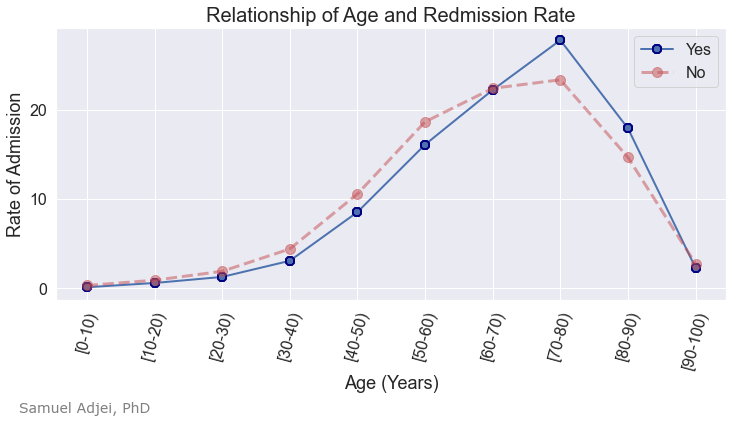

In [44]:
rcParams['figure.figsize'] = 12, 5
plt.plot(Inpatient_admit.age, Inpatient_admit.Percent, marker='8', c='b', ls='-', lw=2, ms=8, mew=2, mec='navy')
plt.plot(no_admit.age, no_admit.Percent, marker='o', c='r', ls='--', lw=3, ms=10, alpha=.5)

plt.xlabel('Age (Years)', fontsize=18)
plt.ylabel('Rate of Admission', fontsize=18) 
plt.yticks(fontsize=16)
plt.xticks(fontsize=16,rotation=75) 

plt.title("Relationship of Age and Redmission Rate", fontsize=20)
plt.legend(['Yes', 'No'], fontsize=16)

#Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -1, -14, "Samuel Adjei, PhD", color='grey',
    fontsize=14, font="Verdana");

- What is the prevalence of primary diagnoses within different age groups?

There are about 848 distinct primary health conditions that occassioned the admission of patients. These different conditions have been categorized into 8 diagnostic groups, namely: Diabetes mellitus, Digestive, Respiratory, Circulatory, Injury, Musculoskeletal, Neoplasms, Genitourinary, and Other. Any diagnosis accounting for less than 3.5% of patient cases has been grouped into the 'Other' category (Strack, Beata, et al). Let's examine the frequencies of this 8 diagnostic groups within the different age groups.

In [45]:
def grouper(i):
    try:
        i = float(i)
        i = int(i)
    except ValueError:
        return "other"

    if (140 <= i <= 239):
        return "Neoplasms"
    elif (390 <= i <= 459 or i==785):
        return "Circulatory"
    elif (460 <= i <= 519 or i==786):
        return "Respiratory"
    elif (520 <= i <= 579 or i==787):
        return "Digestive"
    elif (250 <= i <= 251):
        return "Diabetes mellitus"
    elif (800 <= i <= 999):
        return "Injury"
    elif (710 <= i <= 739):
        return "Musculoskeletal"
    elif (680 <= i <= 629 or i==788):
        return "Genitourinary"
    elif (i == "missing"):
        return "missing"
    else:
        return "other"

modified_df["diag_1_recode"] = modified_df["diag_1"].apply(grouper)

We need to perform some feature engineering here. Let's first recode all the values under the primary diagnosis attribute into their respective health conditions or diseases, as shown below. Invalid or unknown values will be assigned the placeholder 'missing'.

Let's also recode the ages into a more simplified group. All ages under 40 will be grouped under the age bracket 0-40, and those above 80 years will be recoded as 80-100

In [46]:
#Recoding the values of the variable age into different groups--------------------------------------------------------------
def age_category(age):
    if age in ["[0-10)", "[10-20)", "[20-30)", "[30-40)"]:
        return "[0-40]"
    elif age in ["[80-90)", "[90-100)"]:
        return "[80-100]"
    elif age == "[40-50)":
        return "[40-50]"
    elif age == "[50-60)":
        return "[50-60]"
    elif age == "[60-70)":
        return "[60-70]"
    else:
        return "[70-80]"

modified_df["New_age"] = modified_df["age"].apply(age_category)

In [47]:
#Dropping the variables diag_1 and age from the dataset since they've being recoded and assigned a different variable name
modified_df.drop(["diag_1", "age"], axis=1, inplace=True)

Here, let's first create a subset of the primary diagnosis from the dataset. This data will contain only a column with the newly recoded age groups and the diagnoses. We will then count the number of occurrences in each age group. The result is a DataFrame with each unique combination of age group and diagnosis, along with the count of occurrences.

For each diagnostic category, we create a DataFrame containing only rows with that category and then calculate the percentage of each age group within the category, relative to the total count of cases in the category. We will also round these percentages to two decimal places. Finally, we will plot the percentages of diagnostic categories against the age groups, as shown below

In [48]:
#Group the DataFrame by the age and diag_1_recode columns, and count the number of occurrences of each group
age_vs_diag_1 = modified_df[["New_age","diag_1_recode"]].groupby(["New_age","diag_1_recode"]).size().reset_index(name='count')

Diabetes_mellitus = age_vs_diag_1.loc[age_vs_diag_1['diag_1_recode'] == "Diabetes mellitus"]
Diabetes_mellitus["Percent"] = ((Diabetes_mellitus["count"] / Diabetes_mellitus["count"].sum()) * 100).round(2)

Digestive = age_vs_diag_1.loc[age_vs_diag_1['diag_1_recode'] == "Digestive"]
Digestive["Percent"] = ((Digestive["count"] / Digestive["count"].sum()) * 100).round(2)

Respiratory = age_vs_diag_1.loc[age_vs_diag_1['diag_1_recode'] == "Respiratory"]
Respiratory["Percent"] = ((Respiratory["count"] / Respiratory["count"].sum()) * 100).round(2)

other = age_vs_diag_1.loc[age_vs_diag_1['diag_1_recode'] == "other"]
other["Percent"] = ((other["count"] / other["count"].sum()) * 100).round(2)

Circulatory = age_vs_diag_1.loc[age_vs_diag_1['diag_1_recode'] == "Circulatory"]
Circulatory["Percent"] = ((Circulatory["count"] / Circulatory["count"].sum()) * 100).round(2)

Injury = age_vs_diag_1.loc[age_vs_diag_1['diag_1_recode'] == "Injury"]
Injury["Percent"] = ((Injury["count"] / Injury["count"].sum()) * 100).round(2)

Musculoskeletal = age_vs_diag_1.loc[age_vs_diag_1['diag_1_recode'] == "Musculoskeletal"]
Musculoskeletal["Percent"] = ((Musculoskeletal["count"] / Musculoskeletal["count"].sum()) * 100).round(2)

Neoplasms = age_vs_diag_1.loc[age_vs_diag_1['diag_1_recode'] == "Neoplasms"]
Neoplasms["Percent"] = ((Neoplasms["count"] / Neoplasms["count"].sum()) * 100).round(2)

Genitourinary = age_vs_diag_1.loc[age_vs_diag_1['diag_1_recode'] == "Genitourinary"]
Genitourinary["Percent"] = ((Genitourinary["count"] / Genitourinary["count"].sum()) * 100).round(2)

The underlying primary health condition that occassioned the admission of majority of the patients within the age group of 0-40 is diseases of the digestive system. Diseases most prevalent in the ages of 60 to 70, and 70 to 80 include diseases of the genitourinary, neoplasms, disease of the musculoskeletal system and connective tissue, and diseases of the circulatory system. Beside the age group of 40-50 where diabetes mellitus appears as the main underlying primary health concerns, this condition tends to be a less significantfactor in hospital admissions among other age groups. 

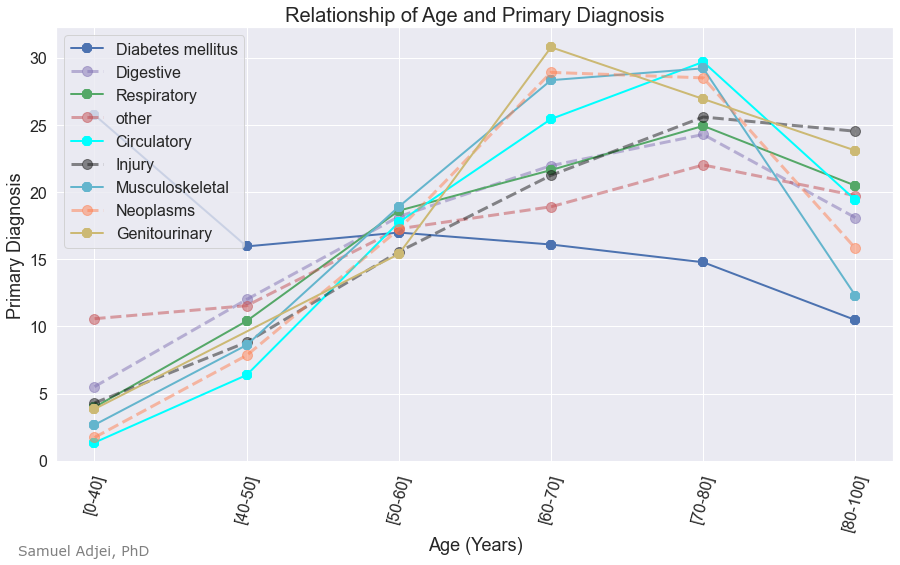

In [49]:
rcParams['figure.figsize'] = 15, 8

plt.plot(Diabetes_mellitus.New_age, Diabetes_mellitus.Percent, marker='8', c='b', ls='-', lw=2, ms=8, mew=2, mec='b')
plt.plot(Digestive.New_age, Digestive.Percent, marker='o', c='m', ls='--', lw=3, ms=10, alpha=.5)

plt.plot(Respiratory["New_age"], Respiratory.Percent, marker='8', c='g', ls='-', lw=2, ms=8, mew=2, mec='g')
plt.plot(other["New_age"], other.Percent, marker='o', c='r', ls='--', lw=3, ms=10, alpha=.5)

plt.plot(Circulatory["New_age"], Circulatory.Percent, marker='8', c='aqua', ls='-', lw=2, ms=8, mew=2, mec='aqua')
plt.plot(Injury["New_age"], Injury.Percent, marker='o', c='k', ls='--', lw=3, ms=10, alpha=.5)

plt.plot(Musculoskeletal["New_age"], Musculoskeletal.Percent, marker='8', c='c', ls='-', lw=2, ms=8, mew=2, mec='c')
plt.plot(Neoplasms["New_age"], Neoplasms.Percent, marker='o', c='coral', ls='--', lw=3, ms=10, alpha=.5)

plt.plot(Genitourinary["New_age"], Genitourinary.Percent, marker='8', c='y', ls='-', lw=2, ms=8, mew=2, mec='y')



plt.xlabel('Age (Years)', fontsize=18)
plt.ylabel('Primary Diagnosis', fontsize=18) 
plt.yticks(fontsize=16)
plt.xticks(fontsize=16,rotation=75) 

plt.title("Relationship of Age and Primary Diagnosis", fontsize=20)
plt.legend(['Diabetes mellitus','Digestive','Respiratory','other','Circulatory','Injury','Musculoskeletal',
           'Neoplasms','Genitourinary'], fontsize=16)

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -.5, -7, "Samuel Adjei, PhD", color='grey',
    fontsize=14, font="Verdana");

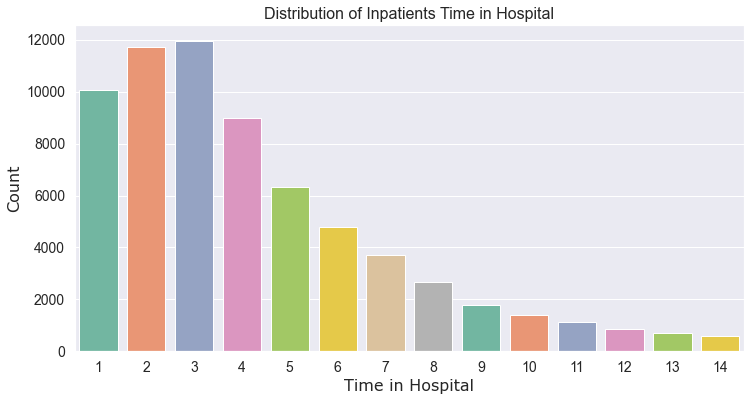

In [50]:
#Distribution of time spent by inpatients in hospital
rcParams['figure.figsize'] = 12, 6
sns.countplot(x=modified_df.time_in_hospital, palette="Set2").set_title("Distribution of Inpatients Time in Hospital", fontsize=16)
plt.xlabel('Time in Hospital', fontsize=16, font="Verdana")
plt.ylabel('Count', fontsize=16, font="Verdana")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14);

Looking at the distribution in the duration of hospital stays, measured from admission to discharge, a substantial proportion of the patients were hospitalized between 1 to 4 days. Only a small proportion of the patiants had extended stays, spanning from 10 to 14 days.

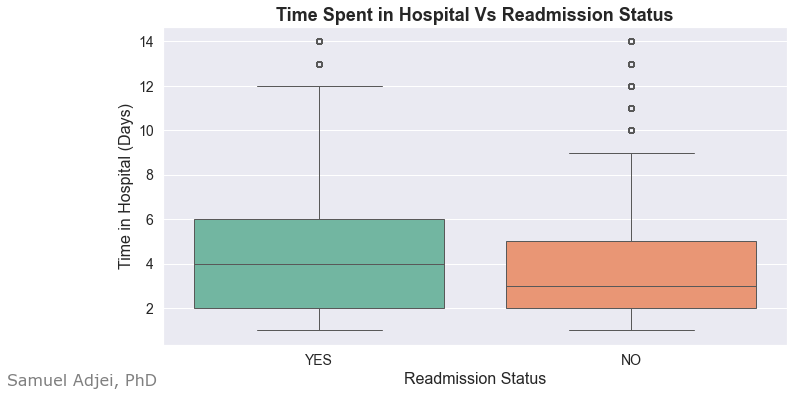

In [52]:
hospital_stay = modified_df[["time_in_hospital", "readmitted"]]
hospital_stay["readmitted"] = np.where(modified_df["readmitted"] == 1, "YES", "NO")

rcParams['figure.figsize'] = 10, 6
axs = sns.boxplot(x="readmitted", y="time_in_hospital", hue="readmitted", data=hospital_stay, palette="Set2")
plt.title("Time Spent in Hospital Vs Readmission Status", fontsize=18, fontweight='bold')


axs.set_xlabel("Readmission Status", fontsize=16)
axs.set_ylabel("Time in Hospital (Days)", fontsize=16)
axs.tick_params(axis='both', labelsize=14)
plt.tight_layout()

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -1, -1.5, "Samuel Adjei, PhD", color='grey',
    fontsize=16, font="Verdana");

The 'Medical Specialty' column is an identifier of the specialty of an admitting physician and corresponds to 84 distinct values. I think we can group these specialties into seven categories. Missing, invalid, or unknown values will be assigned the placeholder 'missing'. Let's recode the values as shown below.

In [53]:
#Recoding the values of the variable medical_specialty into different groups-----------------------------------------------
def MedicalSpecialty(i):
    if i in ["Surgery-Cardiovascular/Thoracic","Surgery-Vascular","Surgery-Neuro","Surgery-Thoracic",
           "Surgery-PlasticwithinHeadandNeck","Surgery-Pediatric","Surgery-Colon&Rectal","Surgery-Plastic",
           "SurgicalSpecialty","Surgery-Cardiovascular","Surgery-Maxillofacial","Surgery-General","Surgeon"]:
        return "Surgery"
    elif i in ["Oncology","Hematology/Oncology","Hematology"]:
        return "Oncology"
    elif i in ["Orthopedics-Reconstructive","Orthopedics"]:
        return "orthopedics"
    elif i in ["Radiologist","Radiology"]:
        return "Radiology"
    elif i in ["ObstetricsandGynecology","Gynecology","Obstetrics","Obsterics&Gynecology-GynecologicOnco"]:
        return "Gynecology"
    elif i in ["Pediatrics","Pediatrics-Endocrinology","Pediatrics-CriticalCare","Pediatrics-eurology",
                "Pediatrics-Pulmonology","Pediatrics-Hematology-Oncology","Pediatrics-EmergencyMedicine",
                "Anesthesiology-Pediatric"]:
        return "Pediatrics"
    elif (i == "missing"):
        return "missing"
    elif i in ["InternalMedicine","Family/GeneralPractice","Emergency/Trauma","Cardiology","Nephrology","Pulmonology",
               "Psychiatry","Urology","Neurology","PhysicalMedicineandRehabilitation"]:
        return i
    else:
        return "Other"

modified_df["MedicalSpecialty"] = modified_df["medical_specialty"].apply(MedicalSpecialty)
modified_df.drop("medical_specialty", axis=1, inplace=True)

### Target Variable Distribution

In the dataset, the target variable "readmission" is categorized into three groups: "30days" for patients readmitted within 30 days, “>30” for those readmitted after more than 30 days, and “No” for no record of readmission. The "30 days" and ">30 days" are recoded with the value 1, while 'NO' is recoded with the value 0. Let's find out the distribution of these two levels within the "readmission" attribute and even explore their prevalence across the other attributes in the dataset.

There's unequal representation of readmitted patients and patients with no record of readmission in the dataset. The difference between the two target classes is about 12000, constituting an outlier fraction of approximately 70 percent.

In [54]:
#Determine the number of readmitted patients vs those with no reacord of readmission
Yes = modified_df[modified_df["readmitted"] == 1]
No = modified_df[modified_df["readmitted"] == 0]

Outlier_fraction = round(len(Yes) / float(len(No))*100, 2)
percent_Yes = round(Yes["readmitted"].value_counts().iloc[0] / len(modified_df)*100, 2)
percent_No = round(No["readmitted"].value_counts().iloc[0] / len(modified_df)*100, 2)

print('The outlier_fraction is about {}'.format(Outlier_fraction))
print('The number of readmitted patients is {}, accounting for {}% of patients in the dataset'\
                                                                                          .format(len(Yes), percent_Yes))
print('The number of patients with no record of readmission is {}, accounting for {}% of patients in the dataset'\
                                                                                            .format(len(No), percent_No))

The outlier_fraction is about 69.53
The number of readmitted patients is 27363, accounting for 41.01% of patients in the dataset
The number of patients with no record of readmission is 39355, accounting for 58.99% of patients in the dataset


We can explore the distribution of the two target classes across the numeric variables in the dataset. Let's use Kernel Density Estmation (KDE) plots, which are one of the most effective ways to visualize the distribution patterns of continuous variables. As shown in the plot below, while some variables show an even distribution across the two target variables, others are heavily skewed. This will require additional work before we start developing our predictive algorithms.

In [55]:
#Subsetting the numerical attributes from the dataset
numeric_cols = modified_df.select_dtypes(include=np.number).columns.tolist()
numeric_df = modified_df[numeric_cols]

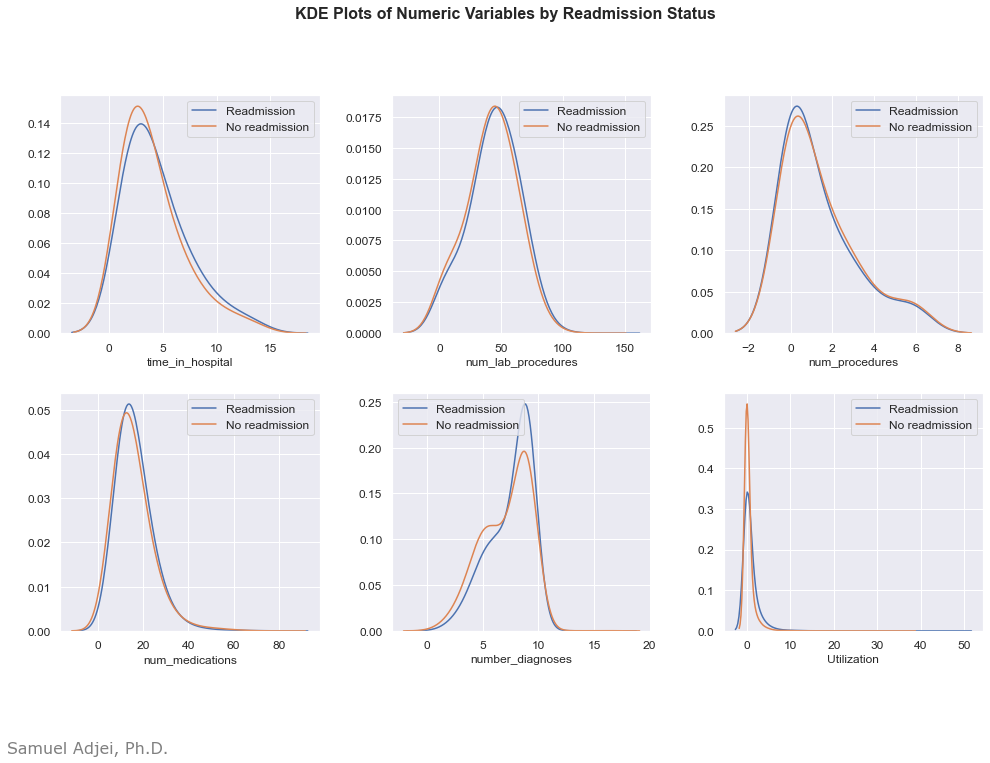

In [56]:
var = numeric_df.drop("readmitted", axis=1).columns.values
Yes = numeric_df[numeric_df["readmitted"] == 1]
No = numeric_df[numeric_df["readmitted"] == 0]

sns.set_style('darkgrid')
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle('KDE Plots of Numeric Variables by Readmission Status', fontsize=16, fontweight='bold')
fig.subplots_adjust(hspace=0.5, wspace=0.4)

i = 0
for col in var:
    i += 1
    ax = plt.subplot(2, 3, i)
    sns.kdeplot(Yes[col], bw=0.5, label = "Readmission", ax=ax, palette="Set2")
    sns.kdeplot(No[col], bw=0.5, label = "No readmission", ax=ax, palette="Set2")
    ax.legend(fontsize=12)
    ax.set_ylabel('')
    ax.set_title('')
    ax.set_xlabel(col, fontsize=12)
    ax.tick_params(axis="both", which="major", labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add authorship----------------------------------------------------------------------------------------------------------
plt.text(
    -170, -.3, "Samuel Adjei, Ph.D.", color='grey',
    fontsize=16, font="Verdana")
plt.show();

### Handling Imbalance Target Variable

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

As we observed above, the target variable is imbalanced, with the number of patients with no readmission far exceeding the number of patients readmitted. We need to balance the count of non-readmitted patients with that of the readmitted patients. This is to ensure a normal distribution of the target groups. Our subsampled data will have a 50/50 ratio with regard to these target groups.

In [58]:
#shuffle the data before subsampling
modified_df = modified_df.sample(frac=1)

#The readmitted group has 27363 counts/rows. We have to get the same representation for the non-readmitted group
readmission = modified_df[modified_df["readmitted"] == 1]
nonreadmission = modified_df[modified_df["readmitted"] == 0][:27363]

#Combine the two classes and shuffle the final rows in the dataset.
combined_target_class = pd.concat([readmission, nonreadmission])
undersample_df = combined_target_class.sample(frac=1, random_state=42)

Let's check for class imbalance after under sampling the dataset.

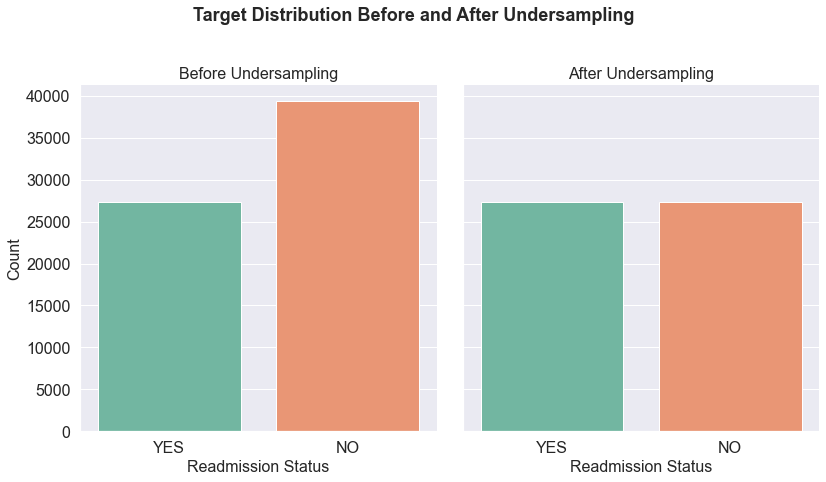

In [59]:
undersample_copy = undersample_df.copy()
modified_df_copy = modified_df.copy()

undersample_copy["readmitted"] = np.where(undersample_copy["readmitted"] == 1, "YES", "NO")
modified_df_copy["readmitted"] = np.where(modified_df_copy["readmitted"] == 1, "YES", "NO")

fig, axs = plt.subplots(ncols=2, figsize=(12, 7), sharey=True)
fig.suptitle("Target Distribution Before and After Undersampling", fontsize=18, fontweight='bold')

sns.countplot(x="readmitted", data=modified_df_copy, ax=axs[0], palette="Set2")
sns.countplot(x="readmitted", data=undersample_copy, ax=axs[1], palette="Set2")

axs[0].set_title("Before Undersampling", fontsize=16)
axs[0].set_xlabel("Readmission Status", fontsize=16)
axs[0].set_ylabel("Count", fontsize=16)
axs[0].tick_params(axis='both', labelsize=16)

axs[1].set_title("After Undersampling", fontsize=16)
axs[1].set_xlabel("Readmission Status", fontsize=16)
axs[1].set_ylabel("Count", fontsize=16)
axs[1].tick_params(axis='both', labelsize=16)

sns.despine()
plt.tight_layout()
plt.show();

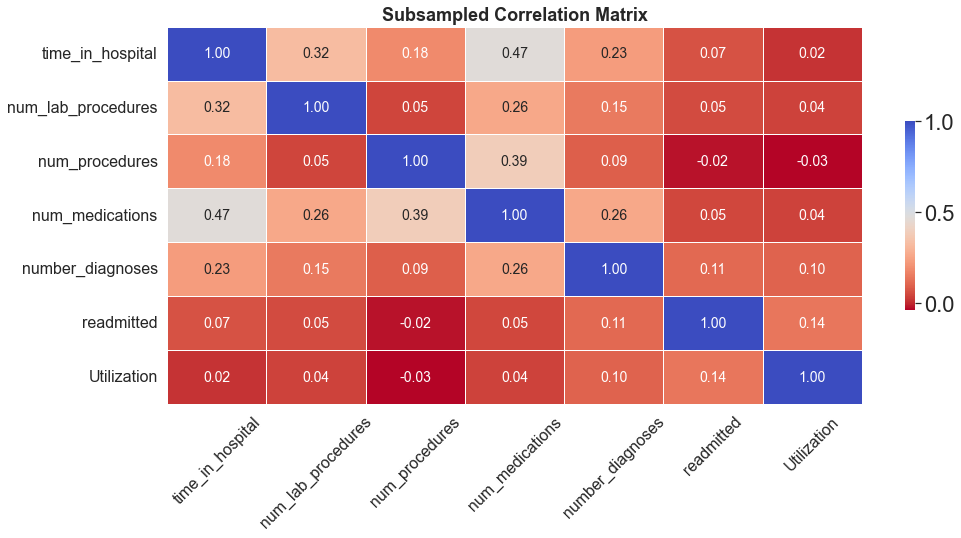

In [60]:
corr = undersample_df.corr()

rcParams['figure.figsize'] = 15, 8
sns.heatmap(corr, cmap="coolwarm_r", annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 14}, cbar_kws={"shrink": .5})
plt.title("Subsampled Correlation Matrix", fontsize=18, fontweight='bold')
plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preparing the dataset to build machine learning models

Let's create three different datasets: Training, Validation and Test Sets

In [61]:
train_val_df, test_df = train_test_split(undersample_df, test_size=0.25, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.20, random_state=42)

In [62]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (32835, 34)
val_df.shape : (8209, 34)
test_df.shape : (13682, 34)


In [63]:
undersample_df.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed',
       'readmitted', 'Utilization', 'diag_1_recode', 'New_age',
       'MedicalSpecialty'],
      dtype='object')

### Identifying Input and Target variables

In [64]:
#Creating list of input variables and also identifying the target variable
input_cols = {'race', 'gender','admission_type_id','discharge_disposition_id','admission_source_id','New_age', 
          'num_lab_procedures','num_procedures','num_medications','number_diagnoses','max_glu_serum','A1Cresult','insulin',
                                                    'change','diabetesMed','Utilization','diag_1_recode', 'diag_2', 'diag_3'}
target_col = "readmitted"

### Creating inputs and targets for the training, validation and test sets for further processing and model training

In [65]:
#Creating input variables for training set
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

#Creating input variables for validation set
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

#Creating input variables for test set
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [66]:
#Identifying which of the variables are numerical and categorical
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

### Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. 
(
0
,
1
)
 or 
(
−
1
,
1
)
. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers. The numeric columns in our dataset have varying ranges.

In [67]:
#Using MinMaxScaler from sklearn.preprocessing to scale values to the (0,1) range
scaler = MinMaxScaler() #Creating the object scalar
scaler.fit(undersample_df[numeric_cols])#Fitting the scalar to compute the range of values for each numeric variable

MinMaxScaler()

In [68]:
#Scaling the training, validation and test sets using the transform method of scaler
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [69]:
#Variables have varying ranges
undersample_df[numeric_cols].describe()

,num_medications,num_procedures,num_lab_procedures,Utilization,number_diagnoses
count,54726.000000,54726.000000,54726.000000,54726.000000,54726.000000
mean,15.692504,1.401290,43.097193,0.612908,7.289753
std,8.120222,1.741096,20.032206,1.491697,1.976391
min,1.000000,0.000000,1.000000,0.000000,1.000000
25%,10.000000,0.000000,31.000000,0.000000,6.000000
50%,14.000000,1.000000,44.000000,0.000000,8.000000
75%,20.000000,2.000000,57.000000,1.000000,9.000000
max,81.000000,6.000000,132.000000,49.000000,16.000000


In [70]:
#Values in each variable lie in the range (0,1)
train_inputs[numeric_cols].describe()

,num_medications,num_procedures,num_lab_procedures,Utilization,number_diagnoses
count,32835.000000,32835.000000,32835.000000,32835.000000,32835.000000
mean,0.183253,0.233648,0.320654,0.012472,0.419156
std,0.101165,0.290286,0.153080,0.029960,0.131856
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112500,0.000000,0.229008,0.000000,0.333333
50%,0.162500,0.166667,0.328244,0.000000,0.466667
75%,0.237500,0.333333,0.427481,0.020408,0.533333
max,0.912500,1.000000,1.000000,0.755102,1.000000


## Encoding Categorical variables

Performing one hot encoding on the categorical variables using the OneHotEncoder class from sklearn.preprocessing

In [71]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(undersample_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

The encoder creates a list of categories for each of the categorical variables in the dataset. Lets generate column names for each individual category using get_feature_names

In [72]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

#Performing the encoding on the categorical variables in the train, validation and test sets using 
#the transform method of encoder
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

#Using the trained model to make predictions on the train and test set
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [73]:
#Lets varify if the new columns have been added to the training, validation and test sets
train_inputs.sample(10).style.background_gradient(cmap="Blues")

## Summary [ Will be updated soon to include the machine learning models ]

The study begins with preprocessing and exploratory analysis steps to clean, transform, explore the data and generate some visuals to better understand the distribution of some of the variables and potential correlations between them. Based on the results of the exploratory analysis, the most significant features in the dataset were selected and used in building machine learning models that have the potential to accurately predict likelihood a patient's readmission after discharged from the hospital. Multiple models were built using different algorithms such as logistic regression, decision trees, random forests, and gradient boosting, and were evaluated using accuracy, precision, and recall metrics. The results indicated that the machine learning models were able to accurately predict the likelihood of hospital readmission, and HbA1c measurements was a significant predictor of readmission rates. These findings support the original hypothesis and highlight the significance of HbA1c measurement in reducing hospital readmission rates.

## REFERENCE

* Strack, B., DeShazo, J. P., Gennings, C., Olmo, J. L., Ventura, S., Cios, K. J., & Clore, J. N. (2014). Impact of HbA1c measurement on hospital readmission rates: analysis of 70,000 clinical database patient records. BioMed research international, 2014.
* [User guide for Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
* [List of properties you can set using update_layout](https://plotly.com/python/reference/layout/)
* [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* [Matplotlib gallery](https://matplotlib.org/3.1.1/gallery/index.html)
* [Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial)
* [opendatasets Python library](https://github.com/JovianML/opendatasets)
* [Plotly documentation](https://plotly.com/python/)
* [BRFSS Webpage](https://www.cdc.gov/brfss/index.html)
* [Overview: Data](https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission/data)